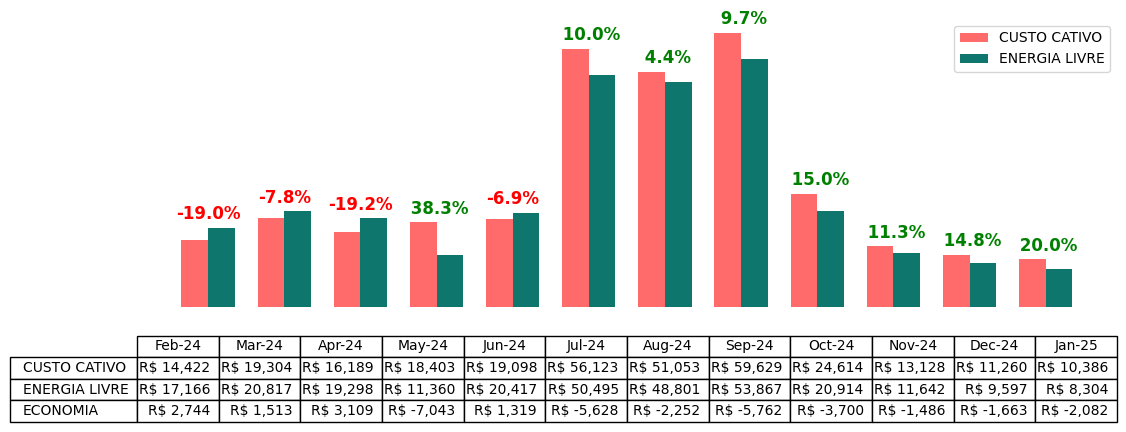

In [ ]:
import os
import matplotlib.pyplot as plt

# Data for the bar chart
months = ['Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24', 'Jul-24', 'Aug-24', 'Sep-24', 'Oct-24', 'Nov-24', 'Dec-24', 'Jan-25']
custo_cativo_values = [14422, 19304, 16189, 18403, 19098, 56123, 51053, 59629, 24614, 13128, 11260, 10386]
energia_livre_values = [17166, 20817, 19298, 11360, 20417, 50495, 48801, 53867, 20914, 11642, 9597, 8304]
economia_values = [-19.03, -7.83, -19.20, 38.27, -6.91, 10.03, 4.41, 9.66, 15.03, 11.32, 14.76, 20.05]

def generate_grouped_bar_chart(months, custo_cativo_values, energia_livre_values, economia_values, output_folder = 'images/', output_filename = 'historico_irigante_plot.svg'):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)


    economia_values = [energia_livre_values[i] - custo_cativo_values[i] for i in range(0,len(energia_livre_values))]
    economia_percent = [-economia_values[i]/custo_cativo_values[i] for i in range(0,len(economia_values))]
    # Create the figure and axis objects
    fig, ax = plt.subplots(figsize=(14, 6))

    # Set bar width and positions
    bar_width = 0.35
    index = range(len(months))

    # Create the grouped bars
    bars1 = ax.bar(index, custo_cativo_values, bar_width, color='#FF6B6B', label='CUSTO CATIVO')
    bars2 = ax.bar([i + bar_width for i in index], energia_livre_values, bar_width, color='#0F766E', label='ENERGIA LIVRE')

    # Add percentage labels above the bars
    for i, value in enumerate(economia_percent):
        if value < 0:
            color = 'red'
        else:
            color = 'green'
        ax.text(i + bar_width / 2, max(custo_cativo_values[i], energia_livre_values[i]) + 1000, f'{value: .1%}', 
                ha='center', va='bottom', color=color, fontweight='bold', fontsize=12)

    # Customize the title and remove unnecessary elements
    ax.tick_params(axis='y', labelsize=10)
    ax.legend()

    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    # Remove ticks and spines
    ax.tick_params(left=False, bottom=False)
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Add a data table below the chart
    cell_text = [
        [f'R$ {custo:,}' for custo in custo_cativo_values],
        [f'R$ {livre:,}' for livre in energia_livre_values],
        [f'R$ {eco:,}' for eco in economia_values]
    ]
    row_labels = ['CUSTO CATIVO', 'ENERGIA LIVRE', 'ECONOMIA']
    col_labels = months

    # Define row colors
    row_colors = ['#FF6B6B', '#0F766E', 'white']  # Match bar colors for the first two rows
    
    # Add the table
    table = ax.table(cellText=cell_text, rowLabels=row_labels, colLabels=col_labels,
                     loc='bottom', bbox=[0, -0.4, 1, 0.3])  # Adjust bbox for spacing
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)  # Adjust font size of the table
    table.scale(1, 1.5)  # Scale the table for better readability

    # Adjust layout to accommodate the table
    plt.subplots_adjust(left=0.2, bottom=0.4)  # Add space for the table

    # Save the plot as a vectorized image
    output_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_path, bbox_inches='tight')  # No need for dpi in vector formats
    plt.close()  # Close the figure to free memory

# Example usage: Save as SVG (vectorized)
generate_grouped_bar_chart(months, custo_cativo_values, energia_livre_values, economia_values)

# Alternatively, save as PDF (vectorized)
# generate_grouped_bar_chart(output_folder='charts', output_filename='grouped_bar_chart.pdf')

In [246]:
economia = [energia_livre_values[i] - custo_cativo_values[i] for i in range(0,len(energia_livre_values))]
economia

[2744,
 1513,
 3109,
 -7043,
 1319,
 -5628,
 -2252,
 -5762,
 -3700,
 -1486,
 -1663,
 -2082]

In [251]:
 economia_percent = [-economia[i]/custo_cativo_values[i] for i in range(0,len(economia))]
economia_percent

[-0.1902648731105256,
 -0.07837753833402404,
 -0.19204398048057322,
 0.3827093408683367,
 -0.06906482354173211,
 0.10027974270798068,
 0.044111021879223555,
 0.09663083399017257,
 0.15032095555374989,
 0.11319317489335771,
 0.14769094138543518,
 0.2004621606008088]